In [202]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pickle

Started by initializing all imports

In [164]:
corn_yields = pd.read_csv('Data/CornCropYieldsCentralIL.csv')

Started to process the first CSV file I downloaded from the NASS Agriculture database from the years 2000-2025 for corn yields in Central Illinois

In [165]:
corn_yields.head()

,Program,YEAR,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,YIELD,CV (%)
0,SURVEY,2024,YEAR,NaN,COUNTY,ILLINOIS,17,CENTRAL,40,LOGAN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,234.5,1.9
1,SURVEY,2024,YEAR,NaN,COUNTY,ILLINOIS,17,CENTRAL,40,MACON,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,243.8,2.1
2,SURVEY,2024,YEAR,NaN,COUNTY,ILLINOIS,17,CENTRAL,40,MCLEAN,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,246.7,1.7
3,SURVEY,2024,YEAR,NaN,COUNTY,ILLINOIS,17,CENTRAL,40,MENARD,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,241.7,1.5
4,SURVEY,2024,YEAR,NaN,COUNTY,ILLINOIS,17,CENTRAL,40,PEORIA,...,NaN,NaN,0,NaN,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,218.4,6.8


In [166]:
corn_yields.columns

Index(['Program', 'YEAR', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'YIELD',
       'CV (%)'],
      dtype='object')

Finished inspecting the data for corn yields and features utilizing pandas for data manipulation

In [167]:
precipitation_avg = pd.read_csv("Data/PrecipitationAverage.csv")
precipitation_avg

,PARAMETER,YEAR,LAT,LON,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,PRECTOTCORR,2000,39.5,-88.125,1.06,2.29,1.55,2.44,3.41,5.84,4.24,4.06,3.76,2.90,3.16,1.48,3.01
1,PRECTOTCORR,2000,39.5,-88.750,1.00,2.00,1.57,2.25,3.39,5.90,4.09,3.76,3.51,2.81,3.16,1.38,2.90
2,PRECTOTCORR,2000,39.5,-89.375,0.97,1.79,1.70,2.04,3.38,5.71,3.70,3.42,3.11,2.60,2.84,1.37,2.72
3,PRECTOTCORR,2000,39.5,-90.000,0.75,1.70,1.75,1.85,3.33,6.16,3.84,2.94,2.66,2.44,2.38,1.21,2.58
4,PRECTOTCORR,2000,40.0,-88.125,1.10,2.03,1.49,2.36,3.35,5.23,3.10,3.26,3.32,2.29,2.99,1.51,2.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,PRECTOTCORR,2024,40.5,-90.000,2.85,0.30,2.57,4.93,2.52,1.95,5.50,2.67,0.64,1.04,3.22,1.63,2.49
396,PRECTOTCORR,2024,41.0,-88.125,3.41,0.48,3.21,4.63,3.53,2.74,4.35,2.62,0.98,0.66,2.83,1.97,2.63
397,PRECTOTCORR,2024,41.0,-88.750,3.30,0.45,3.21,4.65,3.58,2.77,4.11,2.63,0.85,0.69,2.94,1.93,2.60
398,PRECTOTCORR,2024,41.0,-89.375,3.08,0.34,3.14,4.61,2.92,2.76,4.32,2.34,0.52,0.73,2.75,1.53,2.43


In [168]:
precipitation_avg.columns

Index(['PARAMETER', 'YEAR', 'LAT', 'LON', 'JAN', 'FEB', 'MAR', 'APR', 'MAY',
       'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANN'],
      dtype='object')

In [169]:
precipitation_avg.shape

(400, 17)

Finished inspecting the precipitation average chart downloaded from NASA Power database. Decided that I needed to focus on months when corn grew. I also needed to average the precipitation during those months to create an average_precipitation column


In [170]:
precipitation_avg

,PARAMETER,YEAR,LAT,LON,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,PRECTOTCORR,2000,39.5,-88.125,1.06,2.29,1.55,2.44,3.41,5.84,4.24,4.06,3.76,2.90,3.16,1.48,3.01
1,PRECTOTCORR,2000,39.5,-88.750,1.00,2.00,1.57,2.25,3.39,5.90,4.09,3.76,3.51,2.81,3.16,1.38,2.90
2,PRECTOTCORR,2000,39.5,-89.375,0.97,1.79,1.70,2.04,3.38,5.71,3.70,3.42,3.11,2.60,2.84,1.37,2.72
3,PRECTOTCORR,2000,39.5,-90.000,0.75,1.70,1.75,1.85,3.33,6.16,3.84,2.94,2.66,2.44,2.38,1.21,2.58
4,PRECTOTCORR,2000,40.0,-88.125,1.10,2.03,1.49,2.36,3.35,5.23,3.10,3.26,3.32,2.29,2.99,1.51,2.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,PRECTOTCORR,2024,40.5,-90.000,2.85,0.30,2.57,4.93,2.52,1.95,5.50,2.67,0.64,1.04,3.22,1.63,2.49
396,PRECTOTCORR,2024,41.0,-88.125,3.41,0.48,3.21,4.63,3.53,2.74,4.35,2.62,0.98,0.66,2.83,1.97,2.63
397,PRECTOTCORR,2024,41.0,-88.750,3.30,0.45,3.21,4.65,3.58,2.77,4.11,2.63,0.85,0.69,2.94,1.93,2.60
398,PRECTOTCORR,2024,41.0,-89.375,3.08,0.34,3.14,4.61,2.92,2.76,4.32,2.34,0.52,0.73,2.75,1.53,2.43


In [171]:
corn_months = ['MAY', 'JUN', 'JUL', 'AUG']

corn_avg_by_year = (
    precipitation_avg
    .groupby('YEAR')[corn_months]
    .mean()               # average for each month within the year
    .assign(AVG_PRECIPITATION=lambda df: df.mean(axis=1))  # mean across months
    .reset_index()
)


Created means for precipitation during the year by grouping together months of the same year and doing a mean function and then assigning that value to the row AVG_PRECIPITATION

In [172]:
corn_avg_by_year

,YEAR,MAY,JUN,JUL,AUG,AVG_PRECIPITATION
0,2000,3.385000,4.983750,3.331250,2.626875,3.581719
1,2001,3.488125,3.054375,2.812500,3.259375,3.153594
2,2002,5.867500,3.481875,2.454375,3.774375,3.894531
3,2003,3.650625,3.070625,4.817500,3.318750,3.714375
4,2004,5.033750,2.633125,3.278125,4.113750,3.764687
5,2005,1.255625,1.502500,2.625000,2.482500,1.966406
6,2006,2.439375,2.052500,3.439375,3.443125,2.843594
7,2007,1.907500,3.511875,2.867500,3.376250,2.915781
8,2008,4.134375,5.239375,5.213125,1.538750,4.031406
9,2009,4.411875,4.460000,3.636250,3.840625,4.087187


In [173]:
corn_yields.columns

Index(['Program', 'YEAR', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'YIELD',
       'CV (%)'],
      dtype='object')

In [174]:
to_pop = ['Program', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'CV (%)']
for pop in to_pop:
    corn_yields.pop(pop)

I finished removing all unnecessary fields from my corn_yield dataframe here, so I could give th rproper features to my model

In [175]:
corn_yields = corn_yields.merge(
    corn_avg_by_year[['YEAR', 'AVG_PRECIPITATION']],
    on='YEAR',
    how='left'
)

I then merged AVG_PRECIPITATION to rows with the same year in corn_yield as the AVG_PRECIPITATION year in order to properly organize the data

In [176]:
corn_yields

,YEAR,YIELD,AVG_PRECIPITATION
0,2024,234.5,3.265469
1,2024,243.8,3.265469
2,2024,246.7,3.265469
3,2024,241.7,3.265469
4,2024,218.4,3.265469
...,...,...,...
261,2000,166.0,3.581719
262,2000,151.0,3.581719
263,2000,154.0,3.581719
264,2000,165.0,3.581719


In [177]:
temp_data = pd.read_csv('Data/TempAtTwoMeters.csv')

I then repeated the same process for the average precipitation with the temperature and surface wetness data both also retrieved from the NASA Power organization

In [178]:
corn_months = ['MAY', 'JUN', 'JUL', 'AUG']

temp_avg = (
    temp_data
    .groupby('YEAR')[corn_months]
    .mean()               # average for each month within the year
    .assign(AVG_TEMPERATURE=lambda df: df.mean(axis=1))  # mean across months
    .reset_index()
)

In [179]:
corn_yields = corn_yields.merge(
    temp_avg[['YEAR', 'AVG_TEMPERATURE']],
    on='YEAR',
    how='left'
)

In [180]:
surface_wetness_data = pd.read_csv('Data/SurfaceWetness.csv')

In [181]:
corn_months = ['MAY', 'JUN', 'JUL', 'AUG']

wetness_avg = (
    surface_wetness_data
    .groupby('YEAR')[corn_months]
    .mean()               # average for each month within the year
    .assign(AVG_WETNESS=lambda df: df.mean(axis=1))  # mean across months
    .reset_index()
)

In [182]:
corn_yields = corn_yields.merge(
    wetness_avg[['YEAR', 'AVG_WETNESS']],
    on='YEAR',
    how='left'
)

In [183]:
corn_yields.pop('YEAR')
corn_yields.columns

Index(['YIELD', 'AVG_PRECIPITATION', 'AVG_TEMPERATURE', 'AVG_WETNESS'], dtype='object')

I finally removed year from the dataframe as it was not necessary to the training of the model and was only there to properly organize the data

In [184]:
# Load data (replace with your full dataset)
data = corn_yields

# Check data variability
print("Unique Values per Feature:")
print(data[['AVG_PRECIPITATION', 'AVG_TEMPERATURE', 'AVG_WETNESS']].nunique())

Unique Values per Feature:
AVG_PRECIPITATION    25
AVG_TEMPERATURE      25
AVG_WETNESS          25
dtype: int64


There are only 25 unique values as each feature here has only 25 values since they are all averages for one year from years 2000-2024

In [185]:
# Check for outliers
Q1 = data['YIELD'].quantile(0.25)
Q3 = data['YIELD'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['YIELD'] < Q1 - 1.5*IQR) | (data['YIELD'] > Q3 + 1.5*IQR)]
print("\nYIELD Outliers:")
print(outliers)


YIELD Outliers:
     YIELD  AVG_PRECIPITATION  AVG_TEMPERATURE  AVG_WETNESS
124   96.5            1.90875        24.485937     0.504062
129   97.4            1.90875        24.485937     0.504062


I checked here to see if there were any significant outlier that may need to be removed, but they were not significant enough to count as bad data

In [190]:
# Define features and target
X = data[['AVG_PRECIPITATION', 'AVG_TEMPERATURE', 'AVG_WETNESS']]
y = data['YIELD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

I split my data into a train test split of ratio 80:20. I then set up my parameter that I would optimize by giving numerous combinations to try.

In [191]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validated R squared:", grid_search.best_score_)
# Train with best parameters


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validated R squared: 0.8538423265700696


Here I used a scikit-learn hyperparameter tuning pipeline using grid search with cross-validation for a RandomForestRegressor model. This allowed me to find the hyperparameters that would give me the highest R^2 score

In [196]:
rf_model = grid_search.best_estimator_

I assign the model I will use here as the one that was the best estimator by grid search

In [203]:
# Save model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

I save the model as a pkl file here

In [198]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R squared Score: {r2:.2f}")

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Model Performance:
Mean Squared Error (MSE): 98.08
Root Mean Squared Error (RMSE): 9.90
R squared Score: 0.90

Feature Importance:
AVG_WETNESS          0.557322
AVG_PRECIPITATION    0.237204
AVG_TEMPERATURE      0.205474
dtype: float64


I then here check the accuracy of my model by seeing it's scores on my test set. I utilize mean squared error, root mean squared error, and r squared to gauge the accuracy of my model. I also then check what importance the model has assigned to each feature to determine what factor affects corn yields the most.


Predicted YIELD: 203.42


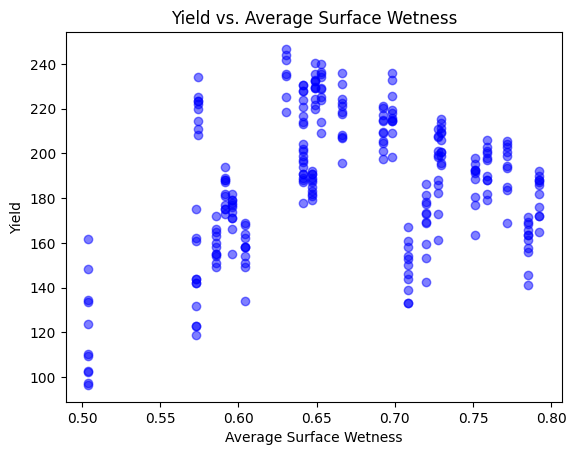

In [199]:
# Predict new data
new_data = pd.DataFrame({
    'AVG_PRECIPITATION': [3.131563],
    'AVG_TEMPERATURE': [21.406562],
    'AVG_WETNESS': [0.73]
})
prediction = rf_model.predict(new_data)
print(f"\nPredicted YIELD: {prediction[0]:.2f}")

# Plot YIELD vs. AVG_PRECIPITATION
plt.scatter(X['AVG_WETNESS'], y, color='blue', alpha=0.5)
plt.xlabel('Average Surface Wetness')
plt.ylabel('Yield')
plt.title('Yield vs. Average Surface Wetness')
plt.show()

I took the trained random forest model and gave it new climate data (average precipitation, temperature, and wetness) to see what yield it would predict. Then I plotted a scatter chart of historical yields versus average precipitation so I can visually check if the prediction makes sense compared to past data.

In [200]:
corn_yields.loc[corn_yields['AVG_WETNESS'] >= 0.7]

,YIELD,AVG_PRECIPITATION,AVG_TEMPERATURE,AVG_WETNESS
38,200.5,3.131563,21.406562,0.729375
39,209.6,3.131563,21.406562,0.729375
40,209.2,3.131563,21.406562,0.729375
41,206.0,3.131563,21.406562,0.729375
42,194.6,3.131563,21.406562,0.729375
...,...,...,...,...
239,154.0,3.894531,21.567344,0.708438
240,161.0,3.894531,21.567344,0.708438
241,167.0,3.894531,21.567344,0.708438
242,150.0,3.894531,21.567344,0.708438
